In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [2]:
# Load the data
data = {
    'Months': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    2013: [54, 67, 92, 83, 44, 75, 63, 32, 64, 59, 91, 87],
    2014: [80, 148, 92, 99, 67, 82, 74, 114, 61, 88, 56, 82],
    2015: [97, 55, 82, 50, 92, 83, 69, 81, 72, 73, 37, 87],
    2016: [46, 89, 97, 78, 29, 80, 54, 110, 80, 78, 83, 63],
    2017: [84, 69, 29, 97, 101, 56, 79, 99, 83, 182, 93, 102],
    2018: [106, 45, 77, 93, 82, 92, 99, 89, 88, 72, 110, 96],
    2019: [63, 98, 87, 64, 83, 121, 78, 66, 32, 82, 88, 92],
    2020: [90, 43, 27, 88, 66, 52, 69, 72, 111, 97, 74, 122],
    2021: [56, 126, 43, 65, 43, 75, 92, 80, 87, 73, 69, 87],
    2022: [71, 69, 80, 54, 83, 97, 83, 70, 63, 99, 93, 74]
}

df = pd.DataFrame(data)
df = df.melt(id_vars=['Months'], var_name='Year', value_name='Births')
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Months'] + '-01')
df = df.sort_values(by='Date').set_index('Date')

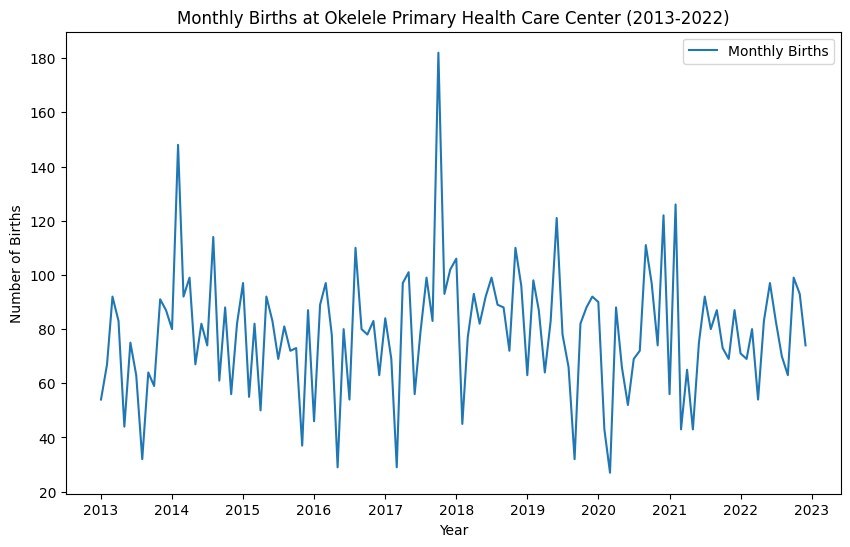

In [3]:
# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(df['Births'], label='Monthly Births')
plt.title('Monthly Births at Okelele Primary Health Care Center (2013-2022)')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.legend()
plt.show()

In [4]:
# Unit root test before differencing
result = adfuller(df['Births'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -10.734175999770859
p-value: 2.927724986297636e-19
Critical Values: {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}


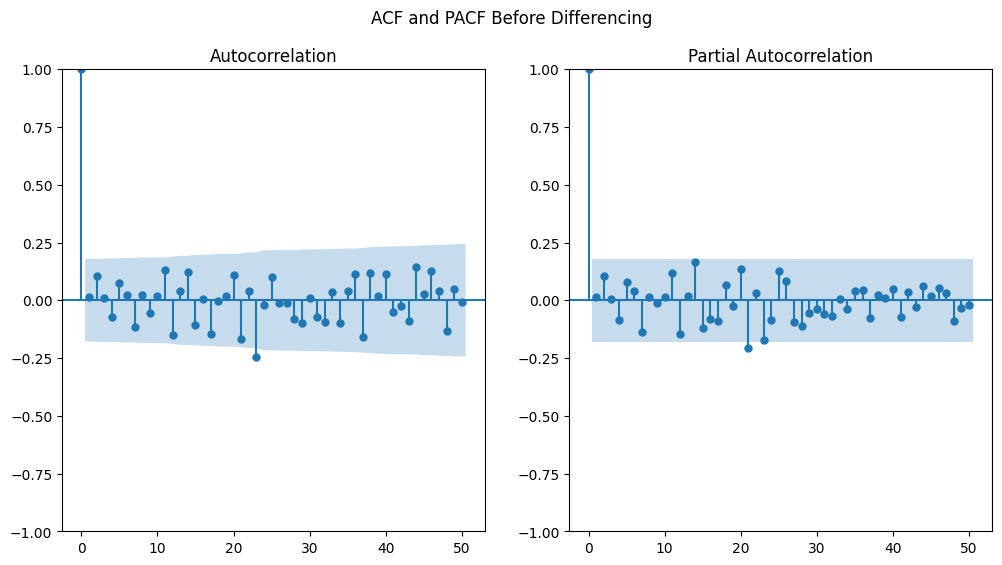

In [5]:
# ACF and PACF before differencing
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['Births'], lags=50, ax=plt.gca())
plt.subplot(122)
plot_pacf(df['Births'], lags=50, ax=plt.gca())
plt.suptitle('ACF and PACF Before Differencing')
plt.show()

In [6]:
# First differencing of the data
df['Births_diff'] = df['Births'].diff().dropna()

# Unit root test after differencing
result_diff = adfuller(df['Births_diff'].dropna())
print('ADF Statistic (Differenced):', result_diff[0])
print('p-value (Differenced):', result_diff[1])
print('Critical Values (Differenced):', result_diff[4])

ADF Statistic (Differenced): -5.8301740868168075
p-value (Differenced): 3.992207483859494e-07
Critical Values (Differenced): {'1%': -3.4936021509366793, '5%': -2.8892174239808703, '10%': -2.58153320754717}


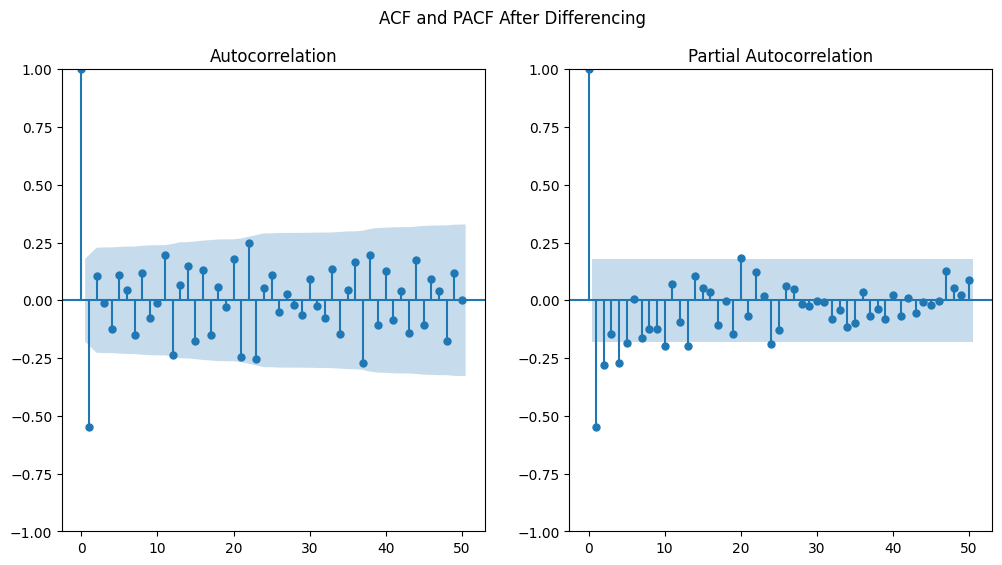

In [7]:
# ACF and PACF after differencing
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['Births_diff'].dropna(), lags=50, ax=plt.gca())
plt.subplot(122)
plot_pacf(df['Births_diff'].dropna(), lags=50, ax=plt.gca())
plt.suptitle('ACF and PACF After Differencing')
plt.show()

In [8]:
# Model specification and identification
model = auto_arima(df['Births'], seasonal=True, m=12)
print(model.summary())

                                 SARIMAX Results                                  
Dep. Variable:                          y   No. Observations:                  120
Model:             SARIMAX(0, 0, [1], 12)   Log Likelihood                -546.266
Date:                    Thu, 25 Jul 2024   AIC                           1098.531
Time:                            17:55:49   BIC                           1106.894
Sample:                        01-01-2013   HQIC                          1101.927
                             - 12-01-2022                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     78.8431      1.869     42.193      0.000      75.181      82.506
ma.S.L12      -0.1552      0.114     -1.360      0.174      -0.379       0.069
sigma2       525.291

In [9]:
# ARIMA model fitting
arima_model = ARIMA(df['Births'], order=model.order, seasonal_order=model.seasonal_order)
arima_result = arima_model.fit()
print(arima_result.summary())

c:\Users\KOLAMIDE\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\KOLAMIDE\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\KOLAMIDE\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                SARIMAX Results                                 
Dep. Variable:                   Births   No. Observations:                  120
Model:             ARIMA(0, 0, [1], 12)   Log Likelihood                -546.266
Date:                  Thu, 25 Jul 2024   AIC                           1098.531
Time:                          17:55:49   BIC                           1106.894
Sample:                      01-01-2013   HQIC                          1101.927
                           - 12-01-2022                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         78.8400      1.869     42.183      0.000      75.177      82.503
ma.S.L12      -0.1552      0.114     -1.359      0.174      -0.379       0.069
sigma2       525.3748     45.327    

In [10]:
# Perform the forecast
forecast_steps = 36  # 3 years of monthly data
forecast = arima_result.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Create the forecast table
forecast_dates = pd.date_range(start='2023-01-01', periods=forecast_steps, freq='M')
forecast_df = pd.DataFrame({
    'TIME': forecast_dates.strftime('%Y:%m'),
    'PREDICTION': forecast_values,
    'STANDARD ERROR': (confidence_intervals.iloc[:, 1] - confidence_intervals.iloc[:, 0]) / 2
})

# Round the values for presentation
forecast_df['PREDICTION'] = forecast_df['PREDICTION'].round(1)
forecast_df['STANDARD ERROR'] = forecast_df['STANDARD ERROR'].round(2)

# Display the forecast table
print(forecast_df)

               TIME  PREDICTION  STANDARD ERROR
2023-01-01  2023:01        80.6           44.92
2023-02-01  2023:02        79.4           44.92
2023-03-01  2023:03        79.7           44.92
2023-04-01  2023:04        83.0           44.92
2023-05-01  2023:05        79.1           44.92
2023-06-01  2023:06        76.2           44.92
2023-07-01  2023:07        77.9           44.92
2023-08-01  2023:08        80.2           44.92
2023-09-01  2023:09        81.0           44.92
2023-10-01  2023:10        75.8           44.92
2023-11-01  2023:11        76.9           44.92
2023-12-01  2023:12        79.2           44.92
2024-01-01  2024:01        78.8           45.46
2024-02-01  2024:02        78.8           45.46
2024-03-01  2024:03        78.8           45.46
2024-04-01  2024:04        78.8           45.46
2024-05-01  2024:05        78.8           45.46
2024-06-01  2024:06        78.8           45.46
2024-07-01  2024:07        78.8           45.46
2024-08-01  2024:08        78.8         

C:\Users\KOLAMIDE\AppData\Local\Temp\ipykernel_12192\1465850224.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start='2023-01-01', periods=forecast_steps, freq='M')


In [11]:
summary = arima_result.summary()
# Parse the summary into a DataFrame
params = summary.tables[1].as_html()
params_df = pd.read_html(params, header=0, index_col=0)[0]

# Add significance levels
params_df['Significance'] = params_df['P>|z|'].apply(lambda p: '***' if p < 0.01 else ('**' if p < 0.05 else ('*' if p < 0.10 else '')))

# Display the table
print(params_df)

C:\Users\KOLAMIDE\AppData\Local\Temp\ipykernel_12192\1704891711.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  params_df = pd.read_html(params, header=0, index_col=0)[0]


              coef  std err       z  P>|z|   [0.025   0.975] Significance
const      78.8400    1.869  42.183  0.000   75.177   82.503          ***
ma.S.L12   -0.1552    0.114  -1.359  0.174   -0.379    0.069             
sigma2    525.3748   45.327  11.591  0.000  436.535  614.214          ***


In [12]:
# Model evaluation metrics
print('AIC:', arima_result.aic)
print('BIC:', arima_result.bic)
print('HQC:', arima_result.hqic)

AIC: 1098.5311697256002
BIC: 1106.8936449539463
HQC: 1101.9272095041604


In [13]:
# Forecasting for 3 years (36 months)
n_periods = 36
forecast, conf_int = arima_result.get_forecast(steps=n_periods).predicted_mean, arima_result.get_forecast(steps=n_periods).conf_int()
forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=n_periods, freq='M')
forecast_series = pd.Series(forecast, index=forecast_index)

C:\Users\KOLAMIDE\AppData\Local\Temp\ipykernel_12192\3241878475.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=n_periods, freq='M')


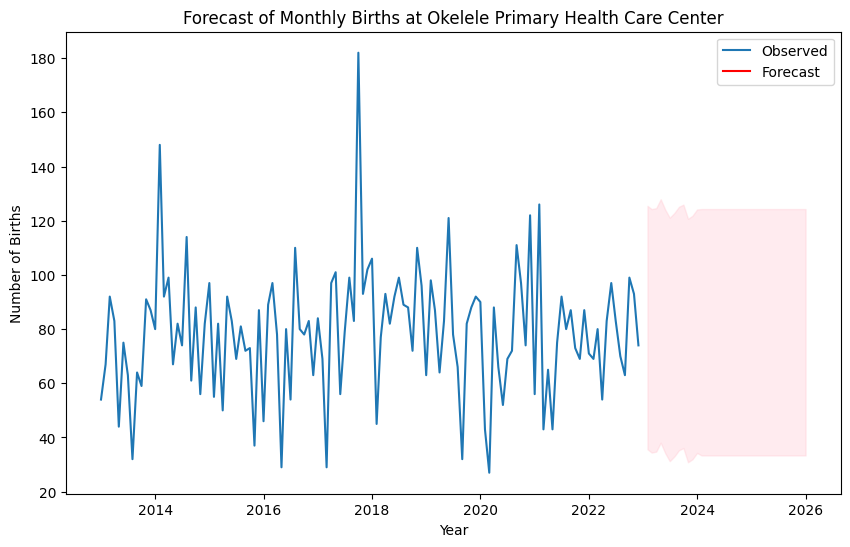

In [14]:
# Plot forecast
plt.figure(figsize=(10, 6))
plt.plot(df['Births'], label='Observed')
plt.plot(forecast_series, label='Forecast', color='red')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Forecast of Monthly Births at Okelele Primary Health Care Center')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.legend()
plt.show()

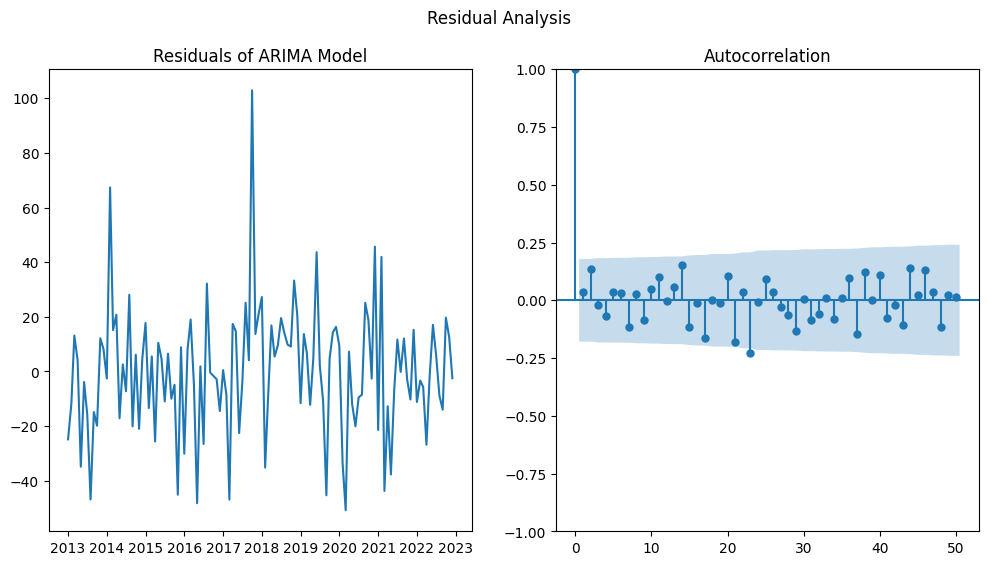

In [15]:
# Residual analysis and model diagnostics
residuals = arima_result.resid
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.subplot(122)
plot_acf(residuals, lags=50, ax=plt.gca())
plt.suptitle('Residual Analysis')
plt.show()

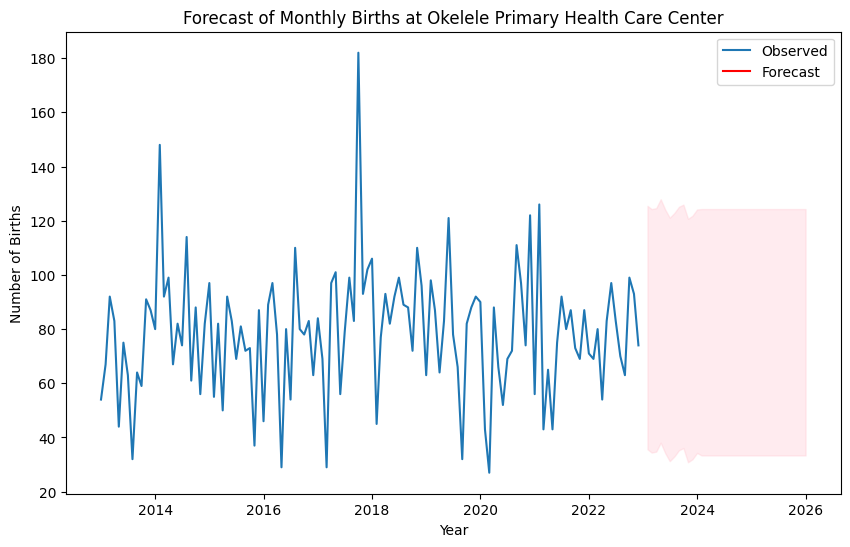

In [16]:
# Result of the forecast graphical representation
plt.figure(figsize=(10, 6))
plt.plot(df['Births'], label='Observed')
plt.plot(forecast_series, label='Forecast', color='red')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Forecast of Monthly Births at Okelele Primary Health Care Center')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.legend()
plt.show()

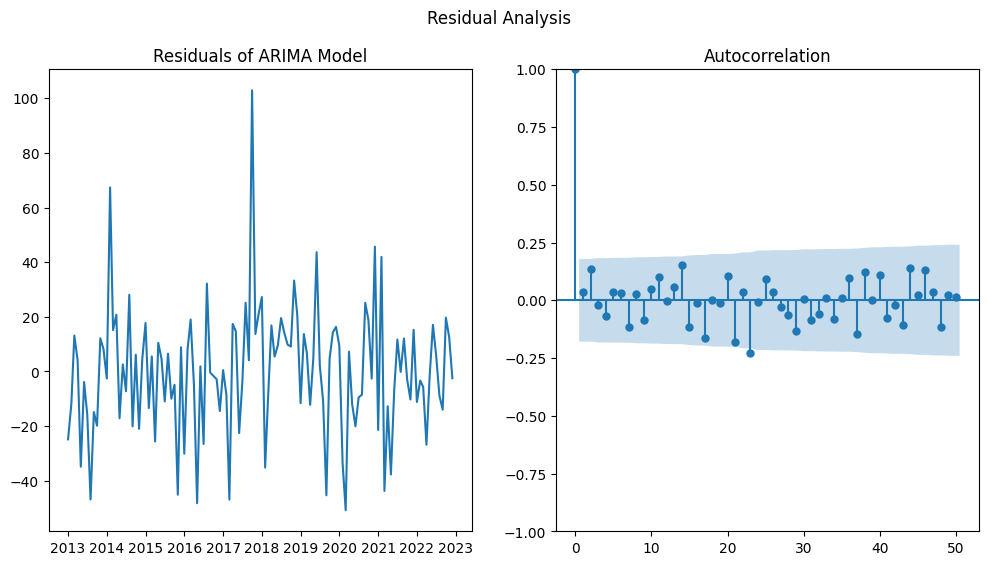

In [17]:
# Residual analysis and model diagnostics
residuals = arima_result.resid
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.subplot(122)
plot_acf(residuals, lags=50, ax=plt.gca())
plt.suptitle('Residual Analysis')
plt.show()

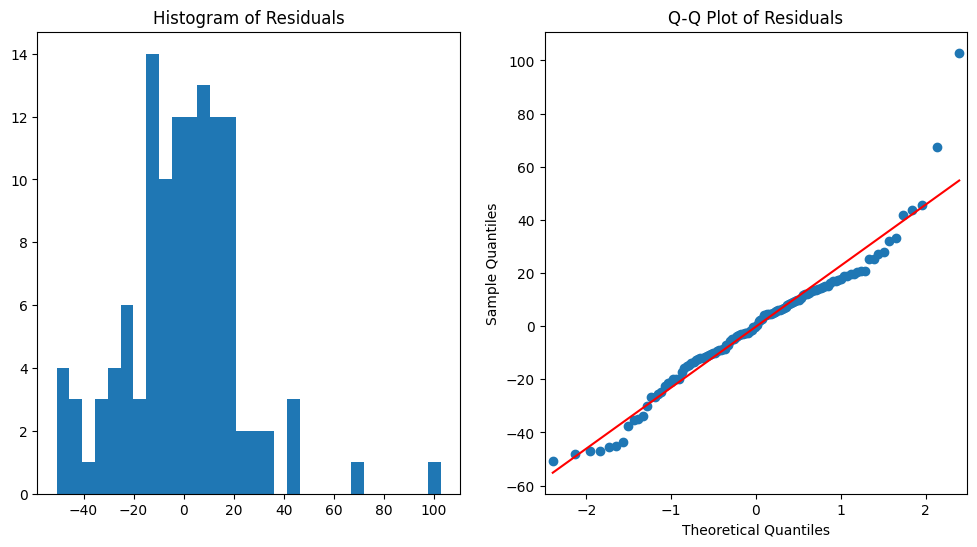

In [18]:
# Residuals histogram and Q-Q plot
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.hist(residuals, bins=30)
plt.title('Histogram of Residuals')
plt.subplot(122)
from statsmodels.graphics.gofplots import qqplot
qqplot(residuals, line='s', ax=plt.gca())
plt.title('Q-Q Plot of Residuals')
plt.show()

In [19]:
# Goodness-of-Fit Measures
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(df['Births'], arima_result.fittedvalues)
rmse = np.sqrt(mse)
mae = mean_absolute_error(df['Births'], arima_result.fittedvalues)
print(f'MSE: {mse}, RMSE: {rmse}, MAE: {mae}')

MSE: 526.4771388461437, RMSE: 22.945089645633196, MAE: 17.029673365756967


In [20]:
# Forecasting for 3 years (36 months)
n_periods = 36
forecast = arima_result.get_forecast(steps=n_periods)
forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=n_periods, freq='M')
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)
conf_int = forecast.conf_int()

C:\Users\KOLAMIDE\AppData\Local\Temp\ipykernel_12192\2371891810.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=n_periods, freq='M')


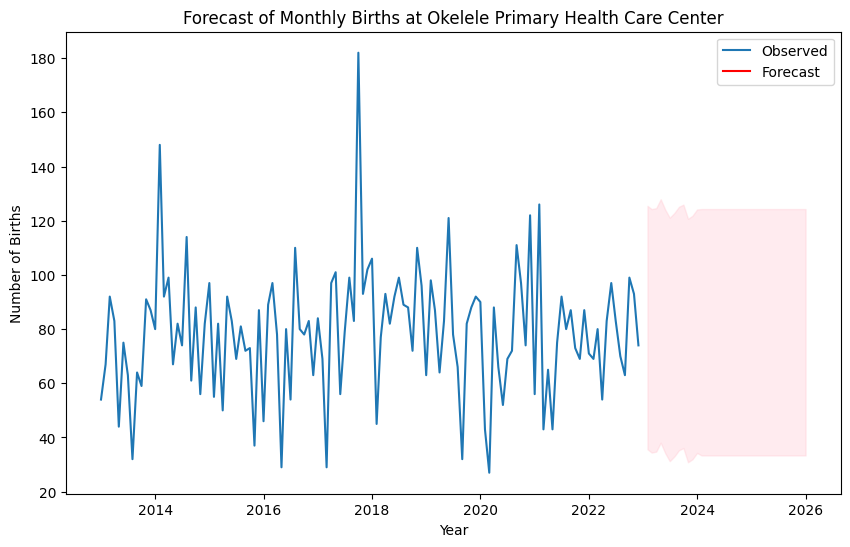

In [21]:
# Plot forecast
plt.figure(figsize=(10, 6))
plt.plot(df['Births'], label='Observed')
plt.plot(forecast_series, label='Forecast', color='red')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Forecast of Monthly Births at Okelele Primary Health Care Center')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.legend()
plt.show()

In [3]:
descriptive_stats = df['Births'].describe()
print(descriptive_stats)

NameError: name 'df' is not defined

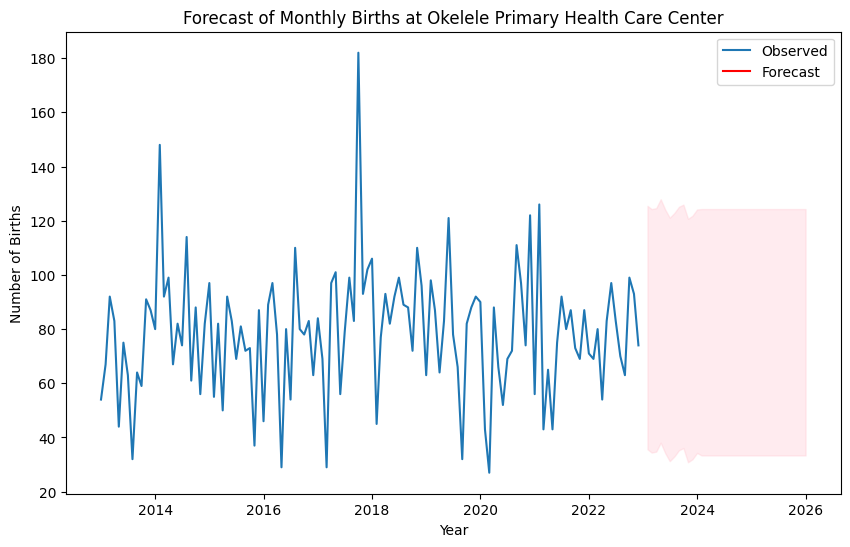

In [22]:
# Result of the forecast graphical representation
plt.figure(figsize=(10, 6))
plt.plot(df['Births'], label='Observed')
plt.plot(forecast_series, label='Forecast', color='red')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Forecast of Monthly Births at Okelele Primary Health Care Center')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.legend()
plt.show()